In [1]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib as mpl

from   astropy.table import Table

In [2]:
cwd = os.getcwd()
code_root = '/'.join(x for x in cwd.split('/')[:-2])

sys.path.append(code_root)

print(cwd)
print(code_root)

/cosma/home/durham/dc-moor2/DESI
/cosma/home/durham


In [3]:
import pubplot

from   cosmo         import cosmo, fsky
from   cartesian     import rotate
from   findfile      import findfile
from   poisson       import fillfactor_expectation, fillfactor_poisson

In [4]:
# update pytest

survey = 'gama'
field  = 'G9'
dryrun = False
realz  = 0
version = 'latest'

In [5]:
# Parameters
field = "G9"
survey = "gama"


In [6]:
nbar = 2.
radius = 8.

In [7]:
fpath = findfile(ftype='randoms', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 10127636),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 4.00000007784879),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 8578.642506361759),
             ('NRAND8_PERR', 92.62096148476196),
             ('EXTNAME', 'RANDOMS')])

In [8]:
fpath

'/cosma/home/durham/dc-moor2/data/v4/randoms/randoms_G9_0.fits'

In [9]:
fpath = findfile(ftype='randoms_n8', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 10127636),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 4.00000007784879),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 8578.642506361759),
             ('NRAND8_PERR', 92.62096148476196),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0)])

In [10]:
fpath = findfile(ftype='randoms_bd', field=field, dryrun=dryrun, survey=survey, version=version)
rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 10127636),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 4.00000007784879),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 8578.642506361759),
             ('NRAND8_PERR', 92.62096148476196),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0)])

In [11]:
rand

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,GAMA_FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,RAND_N8,FILLFACTOR,BOUND_DIST,BOUNDID,FILLFACTOR_POISSON
float64,float64,float32,float32,int64,bytes2,bytes3,float32,float32,float32,float64,float64,float64,int32,float64,float64,int64,float64
130.11138467563958,-1.5990250502052357,0.20251678,1206750.2,3517796,G9,G9,-375.41653,445.64172,-16.266237,580.4137896465367,-49.63757132802027,-21.322639062418382,7223,0.8419747057466913,4.094817929094265,251487,0.8419747057466913
138.47055969653786,2.378178091188476,0.19065896,1014580.1,8601001,G9,G9,-411.51428,364.4542,22.82956,548.8695117348082,33.294593367289224,18.049412047123507,8198,0.9556290513237401,6.029014082275348,265928,0.9556290513237401
130.7860348429962,2.654028137933162,0.2546024,2318409.5,5459259,G9,G9,-472.86722,548.092,33.555424,722.1938169139953,-53.16814409552495,27.265915010640647,7563,0.8816080159992006,4.377653734651103,213315,0.8816080159992006
131.38918415099405,1.6411202284473612,0.23165418,1772609.5,776497,G9,G9,-437.93658,496.9306,18.977303,661.1925234467183,-41.69328189334283,13.218602041861672,8569,1.0,15.715069127851685,241844,0.9988759869228018
140.85198763491033,-1.1668048209392152,0.21458296,1424499.2,6296793,G9,G9,-477.66943,388.8565,-12.545021,612.5917826590163,62.820418924276396,-17.88157310835919,5626,0.6558147161194635,1.761330131048979,118889,0.6558147161194635
138.47457365587294,-0.7603045943354162,0.24045187,1971046.8,6776585,G9,G9,-513.90717,455.0734,-9.109397,685.06601523674,41.62434196192078,-15.077116738604817,8611,1.0,14.884244211158126,277058,1.0037718664245823
135.0680016760792,-0.33631503669650276,0.2420036,2007425.5,2484230,G9,G9,-488.96442,487.80515,-4.0542083,690.6188385399151,0.8424938135873958,-10.070105036046751,8336,1.0,20.072349565974797,326306,0.9717155125438762
133.23378268705753,0.35328105700508167,0.18364343,910693.8,504475,G9,G9,-363.5215,386.654,3.272333,530.4631066084842,-16.339647103783022,-1.3482244571112916,8612,1.0,21.793806078906442,303184,1.0038884349841486
130.03752707031882,-0.5852711230374471,0.18558083,938669.75,6605009,G9,G9,-344.84686,410.42627,-5.4760776,533.9923233471295,-46.35404027394392,-10.127708601316456,8685,1.0,9.719616260255588,28099,1.0123979398324814


In [12]:
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version)

rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 10127636),
             ('FIELD', 'G9'),
             ('AREA', 180.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 4.00000007784879),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 8578.642506361759),
             ('NRAND8_PERR', 92.62096148476196),
             ('EXTNAME', 'TilingCat'),
             ('RSPHERE', 8.0),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em

In [13]:
# also tried ftype='randoms'
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version)
bound = Table.read(fpath, 'BOUNDARY')

Text(0, 0.5, 'DEC [deg.]')

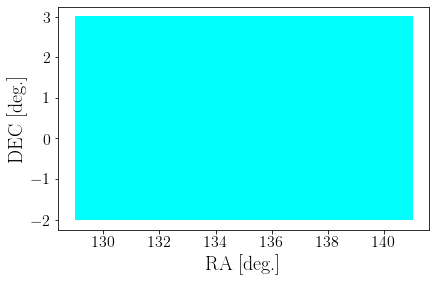

In [14]:
pl.plot(rand['RANDOM_RA'][::10], rand['RANDOM_DEC'][::10], marker=',', lw=0.0, c='k')
pl.plot(bound['RANDOM_RA'], bound['RANDOM_DEC'], marker=',', lw=0.0, c='cyan')
pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

Text(0.5, 0, 'V')

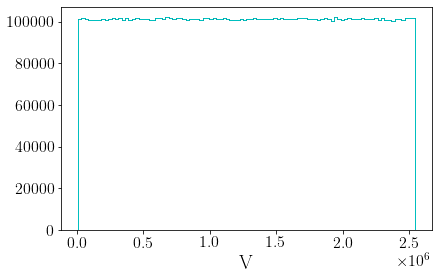

In [15]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(bound['V'], bins=100, histtype='step', color='c')

#_ = pl.hist(rand['V'][rand['IS_BOUNDARY'].astype(bool)], bins=100, histtype='step', color='c')

pl.xlabel('V')

(0.0, 0.6)

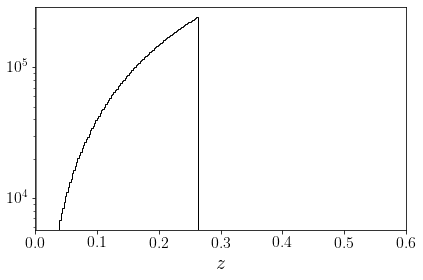

In [16]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')

pl.axvline(300. / 2.9979e5, lw=0.5, c='k')

pl.yscale('log')
pl.xlabel('$z$')

pl.xlim(0.0, 0.6)

In [17]:
pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]
pos_bound = np.c_[bound['ROTCARTESIAN_X'], bound['ROTCARTESIAN_Y'], bound['ROTCARTESIAN_Z']]

Text(0, 0.5, '$y$')

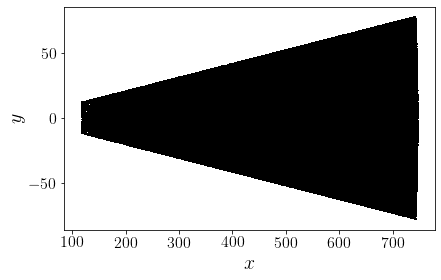

In [18]:
pl.plot(pos[::10,0], pos[::10,1], marker=',', lw=0.0, c='k')

pl.xlabel('$x$')
pl.ylabel('$y$')

Text(0, 0.5, '$y$')

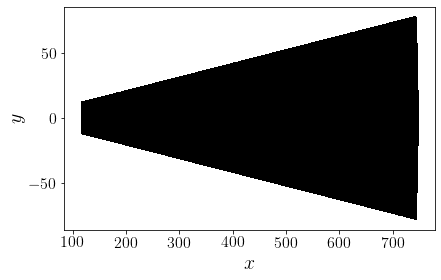

In [19]:
pl.plot(pos_bound[:,0], pos_bound[:,1], marker=',', lw=0.0, c='k')
pl.xlabel('$x$')
pl.ylabel('$y$')

(0.0, 1000.0)

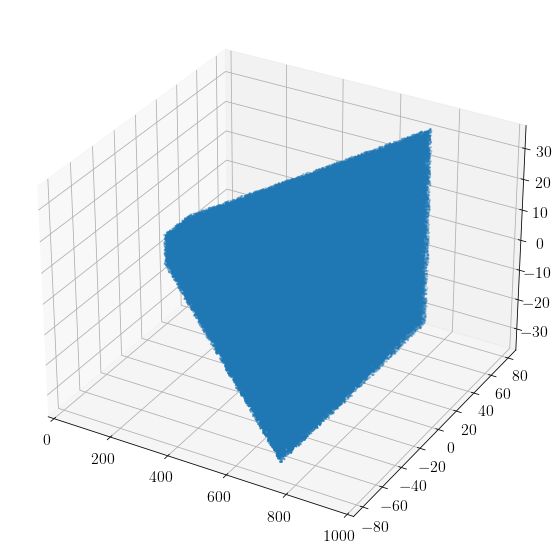

In [20]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos[::10, 0],\
           pos[::10, 1],\
           pos[::10, 2],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

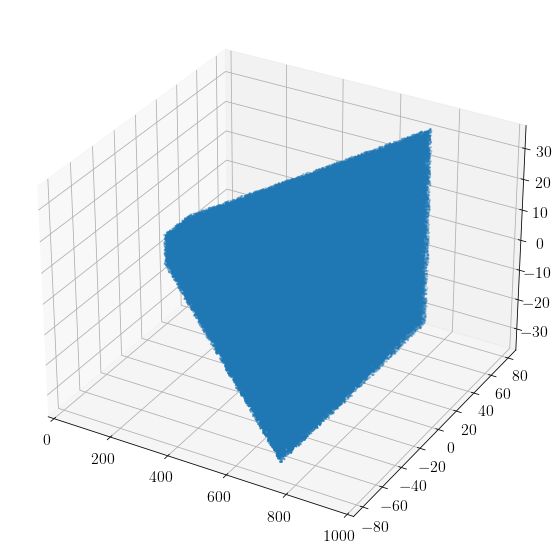

In [21]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos_bound[:,0][::10],\
           pos_bound[:,1][::10],\
           pos_bound[:,2][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [22]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.00999996445369877

In [23]:
rand.dtype.names

('RANDOM_RA',
 'RANDOM_DEC',
 'Z',
 'V',
 'RANDID',
 'FIELD',
 'GAMA_FIELD',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'ROTCARTESIAN_X',
 'ROTCARTESIAN_Y',
 'ROTCARTESIAN_Z',
 'RAND_N8',
 'FILLFACTOR',
 'BOUND_DIST',
 'BOUNDID',
 'FILLFACTOR_POISSON',
 'DDP1_N8',
 'DDP2_N8',
 'DDP3_N8',
 'IN_DDP1',
 'IN_DDP2',
 'IN_DDP3',
 'DDP1_DELTA8',
 'DDP2_DELTA8',
 'DDP3_DELTA8',
 'DDP1_DELTA8_TIER')

In [24]:
rand['RAND_N8'].data.min(), rand['RAND_N8'].data.max()

(1095, 9015)

(50.0, 2500.0)

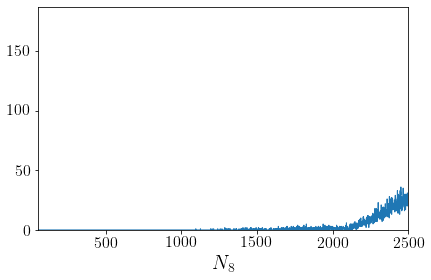

In [25]:
_ = pl.hist(rand['RAND_N8'], bins=np.arange(0, 3500, 1), histtype='step')

pl.axvline(rand.meta['NRAND8'], c='k', lw=0.5)

pl.xlabel(r'$N_8$')
pl.xlim(50., 2500.)

In [26]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

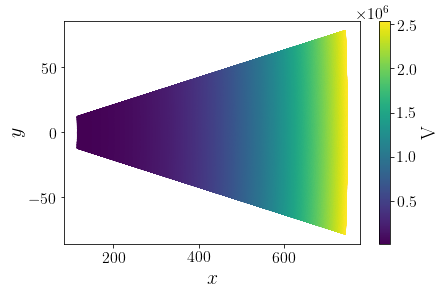

In [27]:
#isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['V'], s=2)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='V')


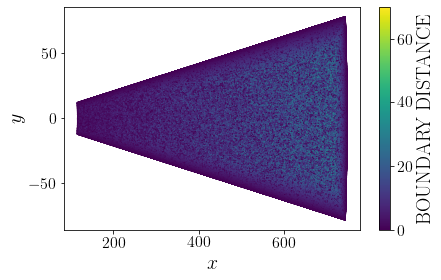

In [28]:
pl.scatter(pos[:,0], pos[:,1], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='BOUNDARY DISTANCE')

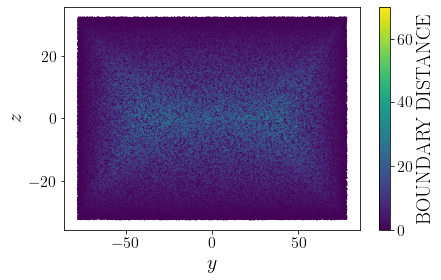

In [29]:
#isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos[:,1], pos[:,2], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$y$')
pl.ylabel('$z$')
pl.colorbar(label='BOUNDARY DISTANCE')

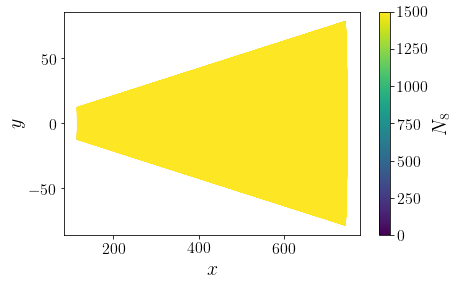

In [30]:
#isin = rand['IS_BOUNDARY'].astype(bool)
pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['RAND_N8'], vmin=0, vmax=1500, s=2)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label=r'$N_8$')

(0.2, 1.2)

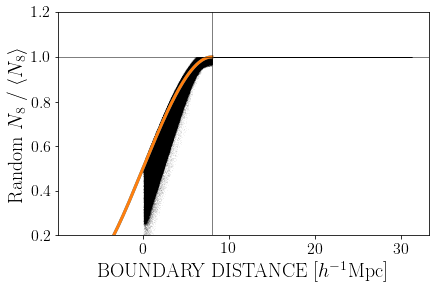

In [31]:
def theory_ff(bound_dist, radius):
    d = bound_dist
    r = radius
    sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]
    
    return sphere_cap_vol

d = np.arange(0., 16., 0.1)
r = np.ones_like(d) * 8 # Mpc/h
sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]

#isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'], rand['FILLFACTOR'], marker='.', lw=0.0, s=1, alpha=0.1, c='k')
pl.plot(8. - d, sphere_cap_vol)
pl.plot(8. - d, theory_ff(d, 8))


pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.2)

/cosma/home/durham/dc-moor2/DESI/poisson.py:21: RuntimeWarning: invalid value encountered in sqrt
  a        = np.sqrt(2 * h * radius - h * h)


(0.2, 1.2)

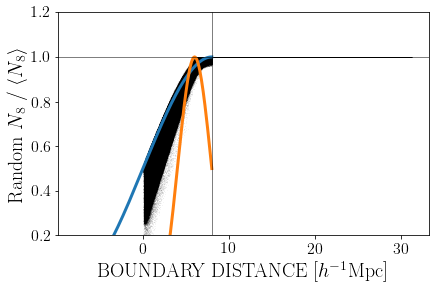

In [32]:
d = np.arange(0., 16., 0.1)
r = np.ones_like(d) * 8 # Mpc/h
sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]

#isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'], rand['FILLFACTOR'], marker='.', lw=0.0, s=1, alpha=0.1, c='k')
pl.plot(radius - d, sphere_cap_vol)
pl.plot(radius - d, fillfactor_expectation(d, nbar, radius))


pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.2)

In [33]:
# rand_density. TODO: source from somewhere else.
n_bar = 2.
radius = 8.

# number of gals expected == Nrand = var
var = n_bar * (4./3.) * np.pi * radius**3

# actual gals
exp = np.mean(rand['FILLFACTOR'] * var)

sig_ff = np.sqrt(var / exp**2)
s2n = np.sqrt(var)

(-0.5, 0.5)

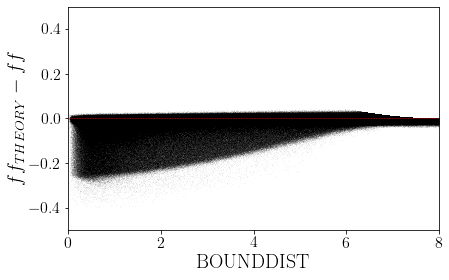

In [34]:
rand['FF_THEORY'] = theory_ff(8 - rand['BOUND_DIST'], 8)

pl.scatter(rand['BOUND_DIST'], rand['FILLFACTOR'] - rand['FF_THEORY'], marker='.', lw=0.0, s=1, alpha=0.1, c='k')
pl.axhline(0, ls='--', lw=0.5, color='r')
#pl.axhline(3* -sig_ff, ls='--', color='cyan')
#pl.axhline(3*sig_ff, ls='--', color='cyan')
pl.xlabel(r'BOUNDDIST')
pl.ylabel(r'$ff_{THEORY} - ff$')
pl.xlim(0, 8)
pl.ylim(-0.5, 0.5)

Text(0.5, 0, 'BOUND_DIST [$h^{-1}$Mpc]')

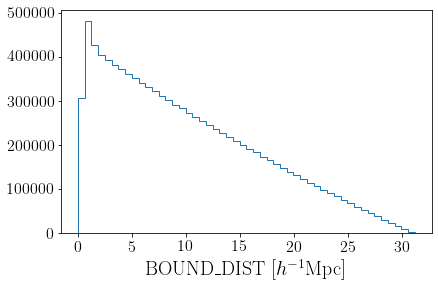

In [35]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [$h^{-1}$Mpc]')

In [36]:
fpath = findfile(ftype='ddp_n8', dryrun=dryrun, survey=survey, version=version)
gold  = Table.read(fpath)
#gold = Table.read(os.environ['HOME'] + '/data/{}/gama_gold_ddp_n8.fits'.format(version))
gold.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

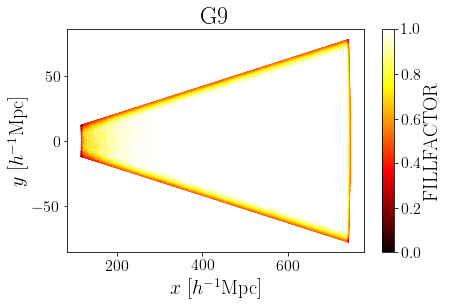

In [37]:
ddp_zmin  = gold.meta['DDP1_ZMIN']
ddp_zmax  = gold.meta['DDP1_ZMAX']

isin      = (rand['Z'] > ddp_zmin) & (rand['Z'] < ddp_zmax)

fills     = rand['FILLFACTOR'].data[isin]
pos_slice = pos[isin]

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
plt.scatter(pos_slice[:,0],\
            pos_slice[:,1],\
            c=fills,\
            marker='.',\
            lw=0.0,\
            s=1,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('$x$ [$h^{-1}$Mpc]')
pl.ylabel('$y$ [$h^{-1}$Mpc]')

pl.colorbar(label='FILLFACTOR')
    
plt.title('{}'.format(field))
plt.show()

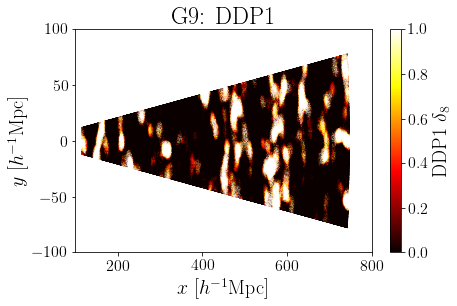

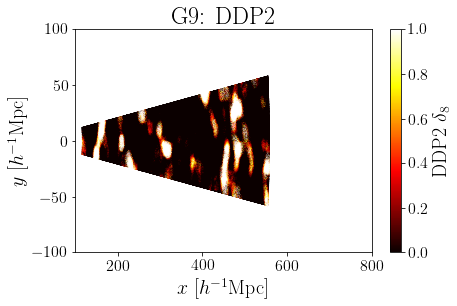

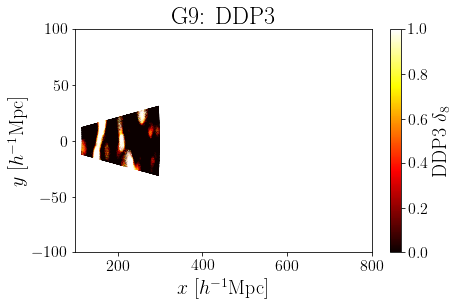

In [38]:
for idx in np.arange(1, 4, 1):
    ddp_zmin  = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax  = gold.meta['DDP{}_ZMAX'.format(idx)]

    isin      = (rand['Z'] > ddp_zmin) & (rand['Z'] < ddp_zmax)

    fills     = rand['DDP{}_DELTA8'.format(idx)].data[isin]
    pos_slice = pos[isin]

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=0.,\
                vmax=1.,\
                cmap='hot')
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP{}  $\delta_8$'.format(idx))
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [39]:
cmap     = plt.cm.tab20c

cmaplist = [cmap(i) for i in range(cmap.N)]

cmap     = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds   = np.linspace(0, 9, 10)
norm     = mpl.colors.BoundaryNorm(bounds, cmap.N)

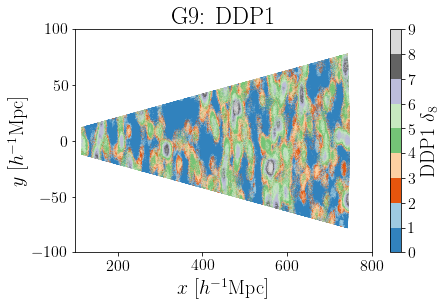

In [40]:
for idx in np.arange(1, 2, 1):
    ddp_zmin  = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax  = gold.meta['DDP{}_ZMAX'.format(idx)]

    isin      = (rand['Z'] > ddp_zmin) & (rand['Z'] < ddp_zmax)
    isin      = rand['DDP{}_DELTA8_TIER'.format(idx)] > -999
    
    fills     = rand['DDP{}_DELTA8_TIER'.format(idx)].data[isin]
    pos_slice = pos[isin]

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=1,\
                cmap=cmap,\
                norm=norm)
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP{}  $\delta_8$'.format(idx))
    
    plt.title('{}:  DDP{}'.format(field, idx))

Text(0, 0.5, 'DDP2 $\\delta_8$')

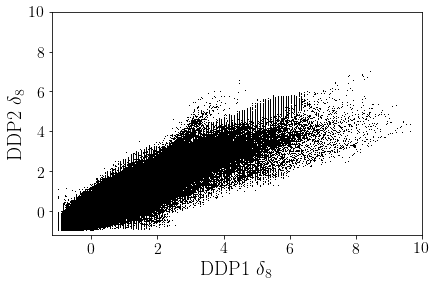

In [41]:
# Larger minimum redshift & Smaller maximum redshift. 
isin = (rand['Z'] > gold.meta['DDP1_ZMIN']) & (rand['Z'] < gold.meta['DDP2_ZMAX'])

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlim(-1.2, 10.)
pl.ylim(-1.2, 10.)

pl.xlabel('DDP1 $\delta_8$')
pl.ylabel('DDP2 $\delta_8$')

In [42]:
rand_ddp1fill = np.clip(np.sort(rand[rand['IN_DDP1']]['FILLFACTOR'].data)[::-1], 0, 1) 
rand_ddp2fill = np.clip(np.sort(rand[rand['IN_DDP2']]['FILLFACTOR'].data)[::-1], 0, 1)
rand_ddp3fill = np.clip(np.sort(rand[rand['IN_DDP3']]['FILLFACTOR'].data)[::-1], 0, 1)

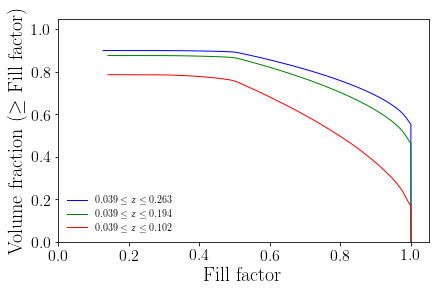

In [43]:
plt.plot(rand_ddp1fill, np.cumsum(rand_ddp1fill) / len(rand_ddp1fill), lw=1, color='blue',  label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP1_ZMIN'], rand.meta['DDP1_ZMAX']))
plt.plot(rand_ddp2fill, np.cumsum(rand_ddp2fill) / len(rand_ddp2fill), lw=1, color='green', label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP2_ZMIN'], rand.meta['DDP2_ZMAX']))
plt.plot(rand_ddp3fill, np.cumsum(rand_ddp3fill) / len(rand_ddp3fill), lw=1, color='red',   label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP3_ZMIN'], rand.meta['DDP3_ZMAX']))

plt.xlabel('Fill factor')
plt.ylabel(r'Volume fraction ($\geq$ Fill factor)')

pl.xlim(0.0, 1.05)
pl.ylim(0.0, 1.05)

plt.legend(frameon=False, loc=3)

# Done.